In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [111]:
data=pd.read_csv('diabetes.csv')

In [112]:
data.shape


(768, 9)

In [113]:
data.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [95]:
data.isnull().values.any()

False

<AxesSubplot:>

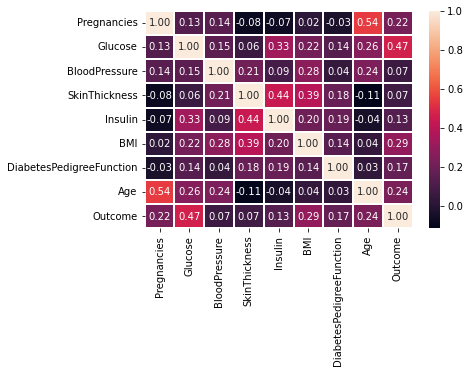

In [116]:
sns.heatmap(data.corr(),linewidths=2,annot=True,fmt=".2f")

In [97]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [98]:
# checking is my dataset balanced or not

data_true_count=len(data.loc[data['Outcome']==1])
data_false_count=len(data.loc[data['Outcome']==0])

In [99]:
(data_true_count,data_false_count)

(268, 500)

In [114]:
#train test split

from sklearn.model_selection import train_test_split

feature_cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
predicted_cols=['Outcome']

In [115]:
X=data[feature_cols].values
y=data[predicted_cols].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [102]:
#checking the zero values

print('total rows: {}'.format(len(data)))
print('number of zero rows Glucose: {} '.format(len(data.loc[data['Glucose']==0])))
print('number of zero rows BloodPressure: {} '.format(len(data.loc[data['BloodPressure']==0])))
print('number of zero rows SkinThickness: {} '.format(len(data.loc[data['SkinThickness']==0])))
print('number of zero rows Insulin: {} '.format(len(data.loc[data['Insulin']==0])))
print('number of zero rows BMI: {} '.format(len(data.loc[data['BMI']==0])))
print('number of zero rows DiabetesPedigreeFunction: {} '.format(len(data.loc[data['DiabetesPedigreeFunction']==0])))
print('number of zero rows Age: {} '.format(len(data.loc[data['Age']==0])))



total rows: 768
number of zero rows Glucose: 5 
number of zero rows BloodPressure: 35 
number of zero rows SkinThickness: 227 
number of zero rows Insulin: 374 
number of zero rows BMI: 11 
number of zero rows DiabetesPedigreeFunction: 0 
number of zero rows Age: 0 


In [118]:
data.loc[data['Glucose'] == 0,'Glucose'] = np.nan
data.loc[data['BloodPressure'] == 0,'BloodPressure'] = np.nan
data.loc[data['SkinThickness'] == 0,'SkinThickness'] = np.nan
data.loc[data['Insulin'] == 0,'Insulin'] = np.nan
data.loc[data['BMI'] == 0,'BMI'] = np.nan



In [120]:
data.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [123]:
data['BloodPressure'].fillna(value=data['BloodPressure'].mean(), inplace=True)
data['Glucose'].fillna(value=data['Glucose'].mean(), inplace=True)
data['SkinThickness'].fillna(value=data['SkinThickness'].mean(), inplace=True)
data['Insulin'].fillna(value=data['Insulin'].mean(), inplace=True)
data['BMI'].fillna(value=data['BMI'].mean(), inplace=True)



In [125]:
data.isnull().values.any()

False

In [158]:
data.drop('BloodPressure',axis=1, inplace=True)

In [159]:
data.head(20)

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,29.15342,155.548223,32.457464,0.232,54,1


In [185]:
#apply algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=5)

random_forest_model.fit(X_train,y_train.ravel())

RandomForestClassifier(random_state=5)

In [186]:
predict_train_data=random_forest_model.predict(X_test)

from sklearn import metrics
print('Accuracy: {0:.3f}'.format(metrics.accuracy_score(y_test,predict_train_data )))



Accuracy: 0.762


In [128]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [162]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [163]:
classifier=xgboost.XGBClassifier()

In [164]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [165]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [166]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 0 minutes and 15.78 seconds.


In [167]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=7,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [141]:
classifier=xgboost.XGBClassifier (base_score = 0.5, booster = 'gbtree', callbacks = None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric = None, gamma = 0.0, gpu_id = -1, grow_policy = 'depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate = 0.1, max_bin = 256, max_cat_to_onehot = 4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha = 0, reg_lambda = 1)

In [182]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y.ravel(),cv=5)

In [183]:
score

array([0.73376623, 0.74675325, 0.74025974, 0.78431373, 0.75816993])

In [184]:
score.mean()

0.7526525761819879

In [174]:
#logistic regression

from sklearn.linear_model import LogisticRegression

In [175]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [176]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[128,  16],
       [ 44,  43]], dtype=int64)

In [181]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7402597402597403
